In [56]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

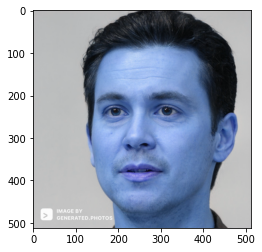

In [57]:
my_image_path = os.getenv('HOME')+'/aiffel/c_s/images/human_face.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

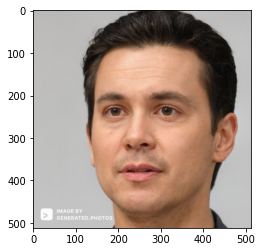

In [58]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [59]:
# Step 2-1. 얼굴 검출

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [60]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(98, 134) (419, 455)]]


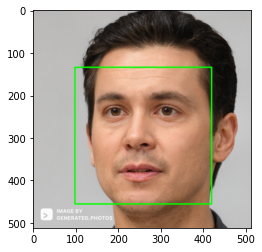

In [61]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [62]:
# Step 2-2. 얼굴 랜드마크 검출

! wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

--2022-01-18 14:35:31--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  26.6MB/s    in 2.3s    

2022-01-18 14:35:34 (26.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [63]:
! mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/c_s/models

In [64]:
! cd ~/aiffel/c_s && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

bzip2: Output file ./models/shape_predictor_68_face_landmarks.dat already exists.


In [65]:
#스티커 섬세하게 적용하려면 이목구비 위치 아는 것이 중요
# 이묵구비 위치 추론하는 것을 face landmark localization 기술이라고함
#fface landmark는 detction의 결과물(아까 그 호그 이용해서 얼굴 검출한거 말하는 것 같음인 bounding box로 잘라낸 얼굴 이미지를 이용

model_path = os.getenv('HOME')+'/aiffel/c_s/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [66]:
#landmark_predictor 는 RGB 이미지와 dlib.rectangle을 입력 받아 
#dlib.full_object_detection 를 반환합니다.

list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


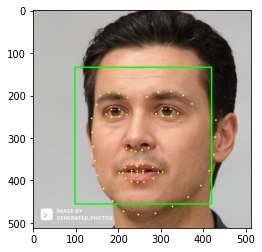

In [67]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [68]:
#Step 3. 스티커 적용 위치 확인하기

In [69]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[62]) # 인중의 index는 62 입니다
    print (landmark[62][0]) # 인중의 index는 62 입니다
    print (landmark[62][1]) # 인중의 index는 62 입니다
    x = landmark[62][0]
    y = landmark[62][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

    #인중의 중심점
    #인중 인덱스로 바꿨는데 수염이 계속 머리 꼭대기에 나옴

(244, 378)
244
378
(x,y) : (244,217)
(w,h) : (322,322)


In [70]:
from PIL import Image, ImageOps, ImageFilter


###########################


#im = Image.open(os.getenv('HOME')+'/aiffel/c_s/images/cat_whiskers.png').convert('RGB')
#im_inv = ImageOps.invert(im)
## im_inv.save('test.png')
## Image boundary Gaussian blurring 
##im_inv = im_inv.filter(ImageFilter.GaussianBlur(5.0))
#im_inv_L = im_inv.convert('L')
##im_inv.save('test.png')

## 이미지 픽셀에 투명화 적용
## alpha = 0(검정): 투명, alpha = 255(흰색): 불투명, 128: 반투명
#im.putalpha(im_inv_L)
#im.save("cat_whiskers_trans.png", "PNG")

##############################

#sticker_path = os.getenv('HOME')+'/aiffel/cat_whiskers_trans.png'

sticker_path = os.getenv('HOME')+'/aiffel/c_s/images/cat_whiskers.png'

#고양이 수염 이미지를 읽고 윗 단계에서 계산한 크기로 리사이즈
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

#type(img_sticker)




print(img_sticker.shape)

(322, 322, 3)


In [71]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
#원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 
#이미지 시작점은 top-left좌표이기 때문

(x,y) : (83,-105)


In [72]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

# 스티커의 시작점이 얼굴 사진 영역 벗어나는 경우를 위한 예외처리

(x,y) : (83,0)


In [76]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

#dst = cv2.addWeighted(sticker_area, 0.7, img_sticker 0.3, 0)
#투명화가 안됨. 뭔가 넣는순서랑 인자가 잘못된거 같음.

print("슝~")

슝~


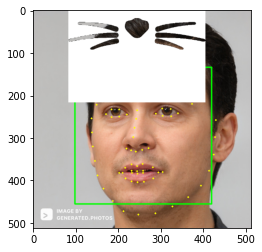

In [77]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

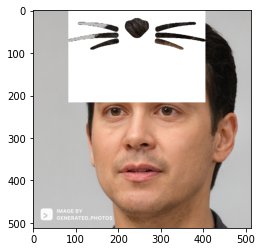

In [78]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8) 
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()